# Introduction

The access to safe drinking water is an important aspect of health, sanitation and hygiene. According to the World Health Organisation, some 2.2 billion people around the world do not have access to safe drinking water<sup>1</sup>. The investment in water supply and sanitation is important for public heath in preventing the spread of diseases and can yield a net economic benefit. Therefore, the development of technologies that can effectively identify safe drinking water will facilitate the deployment of solutions that will alleviate water shortages.   

<sup>1</sup> https://www.who.int/news/item/18-06-2019-1-in-3-people-globally-do-not-have-access-to-safe-drinking-water-unicef-who

## Dataset

The [`water_potability.csv`] dataset contains 10 different water quality metrics for 3276 different water bodies. Linked [here](https://www.kaggle.com/adityakadiwal/water-potability).

## Task

The task is to create a model to determine if the sample tested from the water body is fit for human consumption.


# Data Exploration

In [1]:
# Read in data
import pandas as pd

water_quality = pd.read_csv('~/kaggle/input/water_potability.csv')
water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [2]:
water_quality["Potability"] = water_quality["Potability"].astype("category")
water_quality

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
water_quality.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


In [4]:
water_quality.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Counts are different indicating there are 491, 781, 162 NA's in `ph`, `Sulfate` and `Trihalomethanes` respectively.

In [5]:
water_quality.loc[water_quality["Potability"] == 1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249


In [6]:
water_quality.loc[water_quality["Potability"] == 0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000


## Data distribution

Text(0.5, 0.98, 'Water Quality Distribution plots')

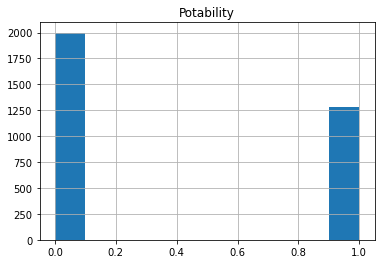

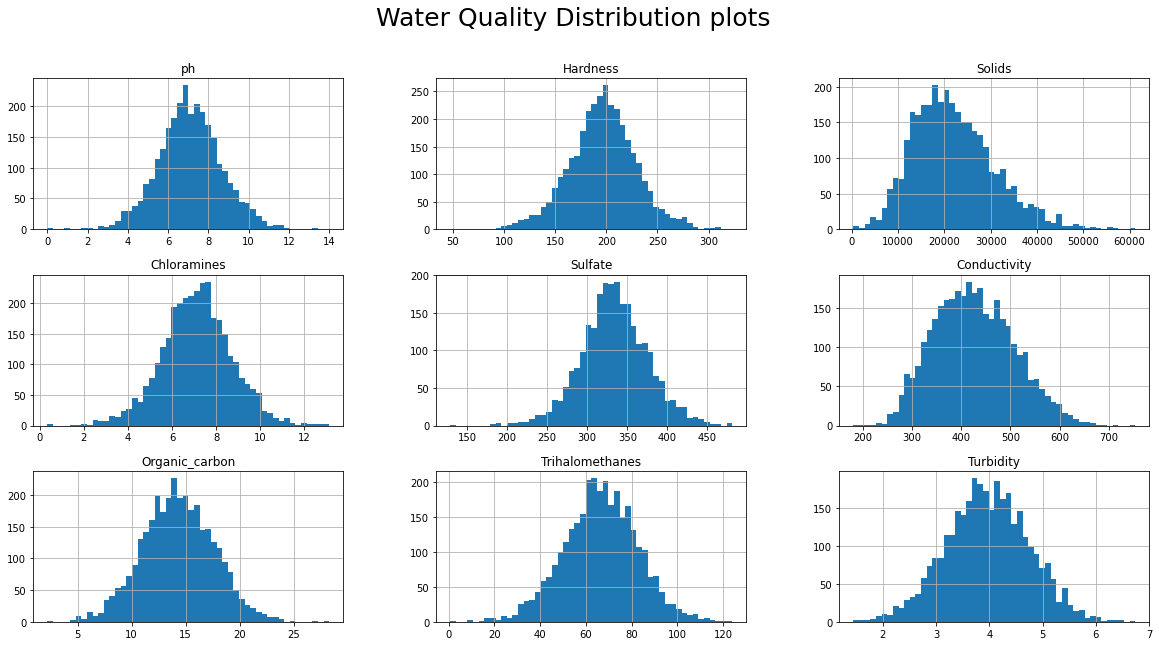

In [7]:
import matplotlib.pyplot as plt
potability = water_quality["Potability"].hist()
potability.set_title("Potability")
water_quality.hist(bins = 50, figsize = (20, 10))
plt.show
plt.suptitle("Water Quality Distribution plots", fontsize = 25)

Overall the data looks fairly normally distributed. Data in the solids are slightly right skewed but still relatively normally distributed. The histogram of potability indicated an unbalanced dataset which may bias the model.

# Data Prep for ML
## Splitting datasets into train and test set

* Stratify the dataset to split into training and testing set.
* Training dataset is up-sampled to address the imbalance in the potability dataset. This should address potential bias in the model as a result of imbalanced training dataset.

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3021,10.337671,163.276225,21820.295875,7.899521,356.179637,561.206238,14.116324,56.193061,5.063109,0
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
431,7.240272,213.423139,23432.962694,5.927868,328.359206,325.387708,14.033553,60.571081,3.832597,0
2427,8.025220,213.519722,15457.498662,7.669540,318.114395,376.314446,9.422745,55.459551,4.134943,1
2803,7.017295,170.132446,20169.344252,5.216280,378.226971,512.768439,15.505992,64.624944,4.899611,1
...,...,...,...,...,...,...,...,...,...,...
1216,6.635894,194.049780,20339.016870,6.032864,307.954902,412.582989,15.894674,57.643457,4.523237,1
1624,6.975209,175.421039,35701.155320,5.494254,290.052802,401.058802,10.285283,66.420579,5.256484,1
715,NaN,193.410141,14472.391549,5.640672,322.674462,431.457337,12.721922,92.758852,4.414819,1
2333,NaN,205.666016,27044.959810,4.033934,298.213816,515.754936,9.057549,48.029690,4.067414,1


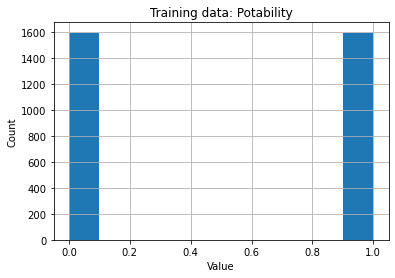

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import resample
from sklearn.utils import shuffle

# Data stratification
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(water_quality, water_quality["Potability"]):
    strat_train_set = water_quality.loc[train_index]
    strat_test_set = water_quality.loc[test_index]
    
# Upsampling of data
portable = strat_train_set.loc[strat_train_set["Potability"] == 1]
not_portable  = strat_train_set.loc[strat_train_set["Potability"] == 0]
portable = resample(portable, replace = True, n_samples = len(not_portable), random_state = 42)
strat_train_set = pd.concat([portable, not_portable])
strat_train_set = shuffle(strat_train_set, random_state = 42)

strat_train_set["Potability"].hist()
plt.title("Training data: Potability")
plt.xlabel("Value")
plt.ylabel("Count")
strat_train_set

In [9]:
strat_test_set["Potability"].value_counts()/len(strat_test_set)

0    0.609756
1    0.390244
Name: Potability, dtype: float64

In [10]:
water_quality["Potability"].value_counts()/len(water_quality)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

Training was initially stratified then upsampled to fix unbalanced Potability data entries. Test data set was not upsampled to preserve data quality. A 60/40 split for non-potable vs potable entries exists in the data. 

## Transformation pipeline

1. Multiple missing value imputation.
2. Standard scaling of data.

Transformation pipeline is created to standardise data transformations for all data being used to train the models. Specifically, the data will be fitted according to training data set values. Fitted information will be used to transform testing data set in order to compared performace between models.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Create pipeline
pipeline = Pipeline([
    ("iterative_imputer", SimpleImputer(strategy = "mean")),
    ("std_scaler", StandardScaler())
])

# predictors
training_pred = pipeline.fit_transform(strat_train_set.drop("Potability", axis = 1))

# explanatory
training_labels = strat_train_set["Potability"].values


# Fit and transform data through pipeline 
training_pred = pd.DataFrame(training_pred)
training_pred


,0,1,2,3,4,5,6,7,8
0,2.220299,-0.984496,-0.030789,0.472445,0.577340,1.629157,-0.056008,-6.412752e-01,1.381348
1,0.048951,0.211347,-0.191451,0.339582,-1.266343,-1.408497,0.070100,5.241846e-01,-0.048619
2,0.094345,0.509742,0.151774,-0.730785,-0.165012,-1.286848,-0.081029,-3.611165e-01,-0.185221
3,0.633108,0.512620,-0.751096,0.332096,-0.438382,-0.657116,-1.474803,-6.882141e-01,0.199696
4,-0.058699,-0.780200,-0.217687,-1.165042,1.165645,1.030201,0.364066,-1.017012e-01,1.173199
...,...,...,...,...,...,...,...,...,...
3191,-0.320481,-0.067530,-0.198479,-0.666710,-0.709475,-0.208638,0.481559,-5.484613e-01,0.694035
3192,-0.087586,-0.622614,1.540608,-0.995404,-1.187169,-0.351140,-1.214071,1.320522e-02,1.627534
3193,0.000000,-0.086589,-0.862617,-0.906050,-0.316702,0.024752,-0.477514,1.698647e+00,0.556008
3194,0.000000,0.278601,0.560674,-1.886586,-0.969403,1.067130,-1.585196,-1.163667e+00,0.113725


# Model Building

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics

def display_scores(scores):
    print("Scores:", scores)
    print("Means:", scores.mean())
    print("Standard Deviation:", scores.std())

logistic_model = LogisticRegression(solver = "liblinear", random_state = 42)
logistic_model.fit(training_pred, training_labels)
log_scores = cross_val_score(logistic_model, 
                             training_pred, 
                             training_labels,
                             scoring = "accuracy", cv = 10)
display_scores(log_scores)

Scores: [0.55       0.496875   0.50625    0.496875   0.528125   0.496875
 0.48902821 0.53291536 0.46394984 0.53918495]
Means: 0.5100078369905956
Standard Deviation: 0.02529166343250258


# Decision Trees

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(training_pred, training_labels)
dt_scores = cross_val_score(dt, 
                           training_pred,
                           training_labels,
                           scoring = "accuracy", cv = 10)
display_scores(dt_scores)

Scores: [0.775      0.778125   0.80625    0.825      0.784375   0.75625
 0.79623824 0.79623824 0.76489028 0.7460815 ]
Means: 0.7828448275862069
Standard Deviation: 0.02269577026050326


# Randomforest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_untuned = RandomForestClassifier(random_state = 42)
rf_untuned.fit(training_pred, training_labels)
rf_scores = cross_val_score(rf_untuned, training_pred, training_labels,
                               scoring = "accuracy")
display_scores(rf_scores)

Scores: [0.840625   0.85446009 0.84037559 0.83881064 0.85446009]
Means: 0.8457462832550862
Standard Deviation: 0.007141933051891663


In [33]:
model_scores = {"mean_cv_accuracy":[np.mean(log_scores),
                               np.mean(dt_scores),
                               np.mean(rf_scores)]}
model_scores = pd.DataFrame(data = model_scores, index = ["log", "dt", "rf"])
model_scores

,mean_cv_accuracy
log,0.510008
dt,0.782845
rf,0.845746


## Random forest hyperparameter tuning by Randomised Search

The following lines of code were adapted from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [16]:
# The following lines of code were adapted from 

from sklearn.model_selection import RandomizedSearchCV

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'criterion': ['gini', 'entropy'],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
               'random_state' : [42]}
rf = RandomForestClassifier(random_state = 42)
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, 
                               verbose=2, n_jobs = -1, random_state = 42)
rf_random.fit(training_pred, training_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'random_state': [42]},
                

In [18]:
rf_random.best_params_

{'random_state': 42,
 'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'criterion': 'gini',
 'bootstrap': False}

## Random forest hyperparameter tuning by Grid Search

Randomised search resulted in parameters where:

* 'n_estimators': 1800,
* 'min_samples_split': 5,
* 'min_samples_leaf': 1,
* 'max_features': 'sqrt',
* 'max_depth': 70,
* 'criterion': 'gini',
* 'bootstrap': False
 
Best parameters from randomised search will feed a more intensive GridSearch for the best performing model ranging at the values defined in the randomised searched parameters.

In [22]:
# Gridsearch for best parameter.
# import joblib

param_1 = {
    "n_estimators" : [int(x) for x in np.linspace(start = 1600, stop = 2000, num = 5)],
    "min_samples_split" : [5],
    "min_samples_leaf" : [1],
    "max_features" : ['sqrt'],
    "max_depth" : [int(x) for x in np.linspace(start = 50, stop = 100, num = 5)],
    "criterion" : ['gini'],
    "bootstrap" : [False],
    "random_state" : [42]
}

param_grid = [param_1]
rf = RandomForestClassifier(random_state = 42)
rf_grid_search = GridSearchCV(rf, param_grid, cv = 5, scoring = "accuracy",
                             return_train_score = True, n_jobs = -1, verbose = 2)
rf_grid_search.fit(training_pred, training_labels)

rf_grid_search.best_estimator_.get_params()

# Export best estimator into pkl file
# joblib.dump(rf_grid_search.best_estimator_, "random_forest_best_estimator.pkl")

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1600,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [26]:
# Gridsearch for best parameter.
# import joblib

param_2 = {
    "n_estimators" : [int(x) for x in np.linspace(start = 1300, stop = 1600, num = 5)],
    "min_samples_split" : [5],
    "min_samples_leaf" : [1],
    "max_features" : ['sqrt'],
    "max_depth" : [int(x) for x in np.linspace(start = 30, stop = 55, num = 5)],
    "criterion" : ['gini'],
    "bootstrap" : [False],
    "random_state" : [42]
}

param_grid = [param_2]
rf = RandomForestClassifier(random_state = 42)
rf_grid_search = GridSearchCV(rf, param_grid, cv = 5, scoring = "accuracy",
                             return_train_score = True, n_jobs = -1, verbose = 2)
rf_grid_search.fit(training_pred, training_labels)

rf_grid_search.best_estimator_.get_params()

# Export best estimator into pkl file
# joblib.dump(rf_grid_search.best_estimator_, "random_forest_best_estimator.pkl")

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 48,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1375,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

First grid search resulted in an `n_estimator` of 700, which is a value that is on the limit of `param_2`. Therefore param_3 will widen the range for `n_estimator`.

In [27]:
rf_best = rf_grid_search.best_estimator_
rf_best.fit(training_pred, training_labels)
forest_scores = cross_val_score(rf_best, training_pred, 
                                training_labels,
                               scoring = "accuracy")
display_scores(forest_scores)

Scores: [0.8515625  0.87010955 0.86384977 0.8513302  0.85289515]
Means: 0.8579494327073552
Standard Deviation: 0.007652910245538512


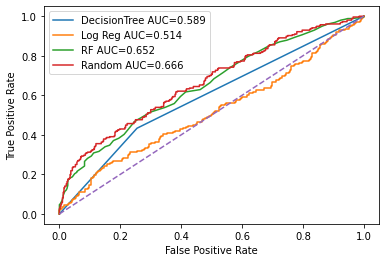

In [34]:
test_features = pipeline.fit_transform(strat_test_set.drop("Potability", axis = 1))
test_labels = strat_test_set.loc[:,"Potability"]

model_list = {"DecisionTree":dt,
              "Log Reg":logistic_model,
             "RF": rf_untuned,
             "Random": rf_best}

# Function to create ROC plot of multiple models.
def plot_multi_roc(model, features, labels):
    
    from sklearn.metrics import roc_curve, roc_auc_score
    from matplotlib import pyplot as plt
    
    if type(model) != dict:
        raise NameError("Not Valid Dict")
        
    for key in model_list:
        model = model_list[key]
        predictions = model.predict_proba(features)[:,1]
        auc = roc_auc_score(labels, predictions)
        fig_label = "%s AUC=%.3f" % (key, auc)
        fpr, tpr, threshld = roc_curve(labels, predictions)
        plt.plot(fpr, tpr, label = fig_label)
    
    plt.plot([0,1],[0,1], linestyle = '--')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_multi_roc(model_list, test_features, test_labels)

True Negative: 371
False Positives: 29
False Negative: 182
True Positives: 74
Sensitivity: 0.7184
Specificity: 0.6709


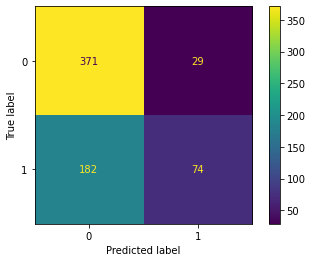

In [35]:
def draw_confusion_matrix(model, features, labels, threshold = 0.5):
    
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    predicted_prob = model.predict_proba(features)
    predicted_prob = pd.DataFrame(predicted_prob)
    predicted_prob["model_classification"] = np.where(predicted_prob.loc[:,1] > threshold, 1, 0)
    cm = confusion_matrix(labels, predicted_prob["model_classification"])
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = model.classes_)
    
    tn, fp, fn, tp = confusion_matrix(labels, 
                                  predicted_prob["model_classification"]).ravel()
    disp.plot()
    print("True Negative: %s\nFalse Positives: %s\nFalse Negative: %s\nTrue Positives: %s" %(tn, fp, fn, tp))
    print("Sensitivity: %.4f\nSpecificity: %.4f" %((tp/(tp+fp)),(tn/(tn+fn))))

draw_confusion_matrix(rf_best, test_features, test_labels, threshold = 0.5)

In [36]:
from sklearn.metrics import accuracy_score

rf_predictions = rf_best.predict(test_features)
accuracy = accuracy_score(test_labels, rf_predictions)
accuracy

0.6783536585365854